In [692]:
import os
import copy
import numpy as np
import pandas as pd
from PIL import Image

class ImageConcat:
    def __init__(self, r=128, n_h=8, n_v=19):
        self.n_h = n_h
        self.n_v = n_v
        self.r = r
        self.img = Image.new("L", (self.n_h*self.r, self.n_v*self.r), color=255)# color=(255,255,255))
        self.cursor = [0,0]
        self.blankimg = Image.new("L", (self.r, self.r), color=240)

    def move_cursor_h(self, r):
        self.cursor[0] += r
        # if self.cursor[0] > self.max_h:
        #     self.max_h = copy.deepcopy(self.cursor[0])
        
    def move_cursor_v(self):
        self.cursor[1] += self.r
        
    def reset_cursor_h(self):
        self.cursor[0] = 0
        
    def append_img(self, path, cut_margin=True, clip_white=False):
        try:
            img = Image.open(path).convert('L').resize((self.r,self.r), Image.BILINEAR)
            if cut_margin:
                img = self.cut_margin(img, clip_white=clip_white)
            self.img.paste(img, tuple(self.cursor))
            return img.size
        except:
            # print(f"Not Appended: {path}")
            self.img.paste(self.blankimg, tuple(self.cursor))
            return None
        
    def add_letter(self, path, cut_margin=True, clip_white=False):
        imgsize = self.append_img(path, cut_margin=cut_margin, clip_white=clip_white)
        if imgsize is None:
            self.move_cursor_h(self.r)
        else:
            self.move_cursor_h(imgsize[0])
    
    def add_space(self):
        self.move_cursor_h(int(self.r/3))
        
    def enter(self):
        self.move_cursor_v()
        self.reset_cursor_h()
        
    def cut_margin(self, img, clip_white):
        npimg = 255 - np.array(img)
        if clip_white:
            npimg[np.where(npimg<10)] = 0 
        wmin = npimg.sum(0).nonzero()[0].min()
        wmax = npimg.sum(0).nonzero()[0].max()
        # hmin = npimg.sum(1).nonzero()[0].min()
        # hmax = npimg.sum(1).nonzero()[0].max()

        npimg = 255 - npimg[:,wmin:wmax+1]
        img = Image.fromarray(npimg)
        return img

In [800]:
fd = "/home/jupyter/ai_font/data/exp0717/train0730_vparts"
k = "ㄱㄲㄴㄷㄸㄹㅁㅂㅃㅅㅆㅇㅈㅉㅊㅋㅌㅍㅎ"

In [972]:
fonts = [f for f in sorted(os.listdir(fd)) if ".ipynb" not in f]
# 어비라미체

In [975]:
np.where(np.array(fonts)=="어비라미체")

(array([147]),)

In [976]:
i = 147

In [1175]:
tfonts = fonts[i:i+2]
print(tfonts)
img = ImageConcat(n_h=len(k), n_v=2)
for font in tfonts:
    for l in k:
        path = f"{fd}/{font}/{font}__{l}.png"
        img.add_letter(path=path, cut_margin=False)
    img.enter()
i += 2

[]


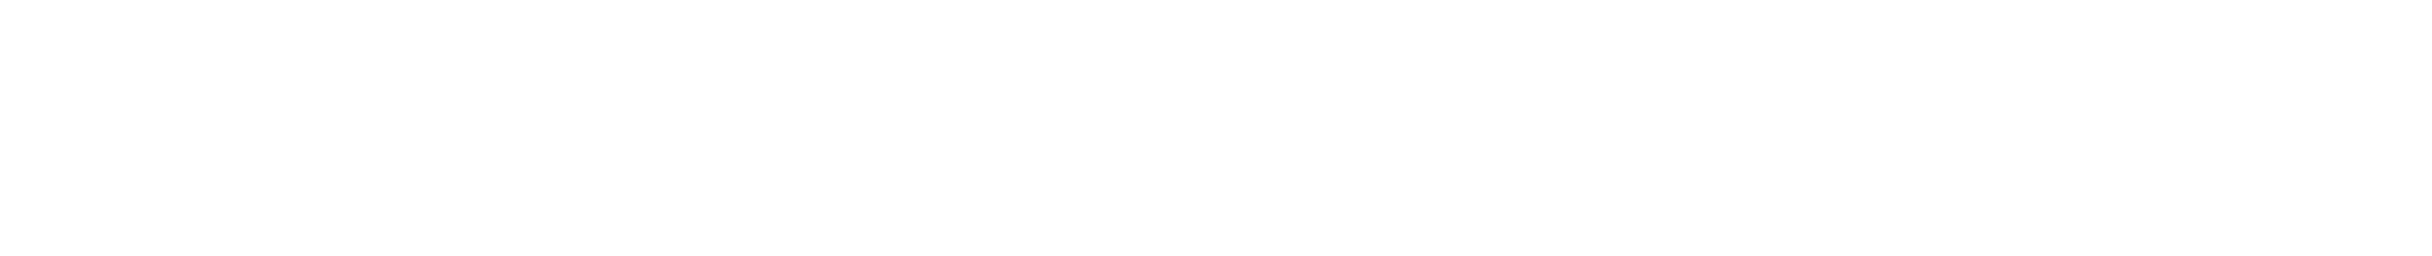

In [1176]:
img.img

In [963]:
i

160